In [6]:
library(ggplot2)
library(MASS)
library(underhill)

In [7]:
#install.packages('~/repos/underhill/pkg/underhill_0.1-0.tar.gz',repos = NULL, type = "source")

In [8]:
nSteps = 10
y = as.data.frame(log(as.numeric(lynx)))
p = 2; d = 0; q = 1;

In [9]:
nSteps = 10
p = 2; d = 0; q = 1;
params = c(p,d,q)
AR = c(0.05, 0.6); MA = c(0.2)

y = as.data.frame(arima.sim(list(order = c(p,d,q), ar =  AR[1:p],  ma = MA[1:q]), n = 1000))

t = 1:nrow(y)
yproc = 3 + t*0.01 + y 

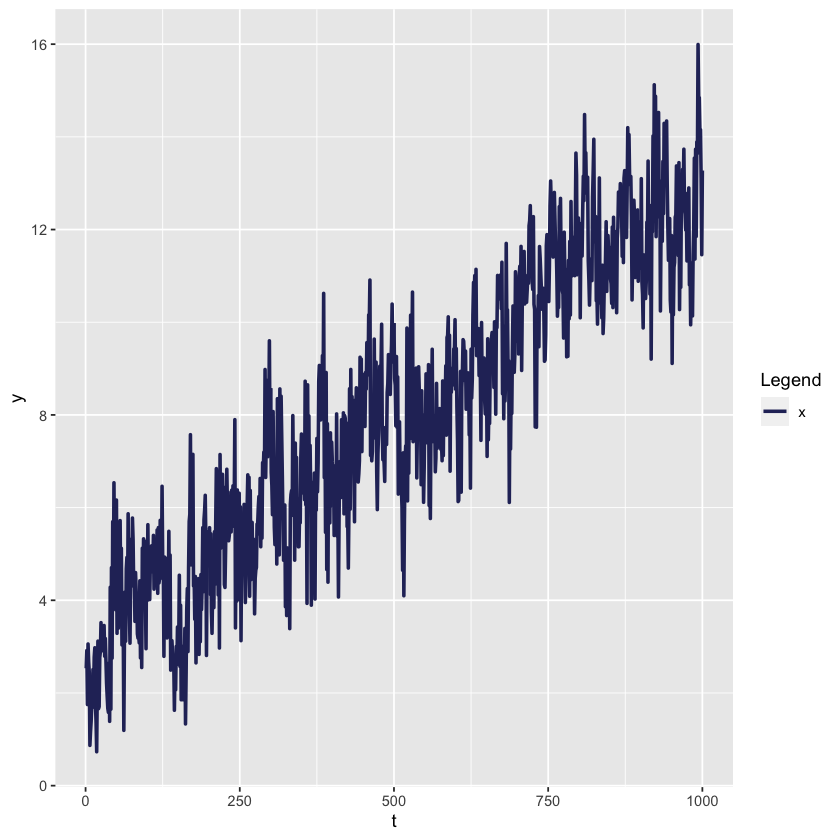

In [10]:
quickTimePlot(yproc,F)$p

In [11]:
nSteps = 100
type = "arima"

In [12]:
N = nrow(y)
t = 1:(nrow(y)+nSteps);
DM= as.data.frame(cbind(1,t))

D = DM[1:(N+1),]
DPred = DM[(N+1):(N+nSteps),]
X = data.frame()

In [13]:
est = estSSModel(yproc, X, D, params, type)
coefsMLE = est$coef
mod = est$Z

In [14]:
# -----------------------------------------
# - stats

H = hessian(yproc, coefsMLE, X, D, params, 0.00001, type) 
vcov_mle = 2*ginv(H)
se = sqrt(diag(abs(vcov_mle)))
pval = (1-pnorm(abs(coefsMLE)/se))*2

In [15]:
# -----------------------------------------
# - fit

kf = kalmanRun(yproc,mod)
kf.fit = kf$states[1,] 
kf.fit = kf$fit
kf.05 = kf.fit - 1.96*kf$se
kf.95 = kf.fit + 1.96*kf$se
kf.sigma2 = kf$sigmahat2  

In [16]:
# -----------------------------------------
# - predict

kp = kalmanPred(nSteps,mod,kf)

# -----------------------------------------
# - R

y.est = arima(yproc, order = c(p,d,q), xreg = D[1:nrow(yproc),2:ncol(D)])
y.est.fit = yproc - as.data.frame(y.est$residuals) 
y.est.pred = predict(y.est, n.ahead = nSteps, newxreg = DPred[,2:ncol(D)]);   


Call:
arima(x = yproc, order = c(p, d, q), xreg = D[1:nrow(yproc), 2:ncol(D)])

Coefficients:
         ar1     ar2     ma1  intercept  D[1:nrow(yproc), 2:ncol(D)]
      0.0445  0.5725  0.2133     2.8517                       0.0102
s.e.  0.0464  0.0285  0.0551     0.1942                       0.0003

sigma^2 estimated as 0.9534:  log likelihood = -1395.49,  aic = 2802.97

[1] -0.1873172545  0.6271958457  0.5387477000  0.1425456913 -0.0002906589

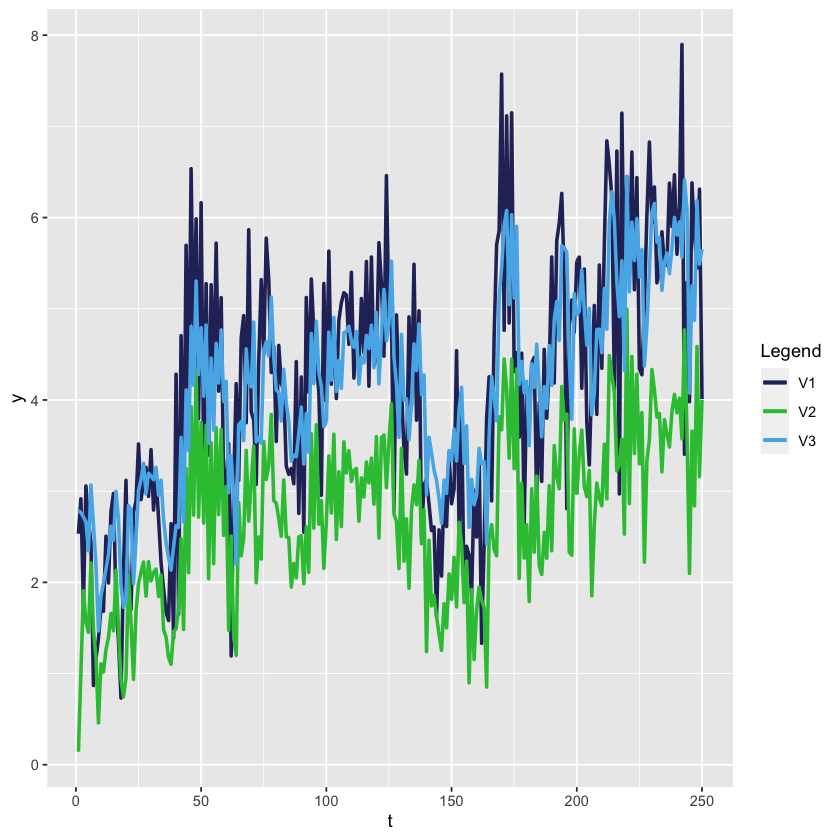

In [17]:
# -----------------------------------------
# - plot

N = 250

yf = cbind(yproc[1:N,],kf.fit[1:N],y.est.fit[1:N,])
quickTimePlot(yf[1:N,],F)$p

#kp$se
#y.est.pred$se

y.est
coefsMLE


In [18]:
length(as.numeric(yproc[,1]))

[1] 1000

In [19]:
t0 = 1:1000
y.reg = lm(yproc[,1] ~ t0)
yres = as.numeric(y.reg$residuals)

est = estSSModel(yres, data.frame(), data.frame(), params, type)
coefsMLE = est$coef
coefsMLE

[1] -0.1873172545  0.6271958457  0.5387477000  0.1425456913 -0.0002906589